# Practice Problem 4
### Problem: Find the GDP of the 10 most populous countries.
Use plt.hist() and plt.subplots().
NOTE: We saw an example of plt.subplots() in Module 3, ***Finding Distribution of Data with Histograms.***

**Using matplotlib, it is possible to show two sets of bars in a single bar chart.**

It is not the simplest solution, but please feel free to play around with this file for an example of how to create a chart like this.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# As usual, we'll import our countries data.
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# Find the 10 most populous countries.
data_2007 = data[data.year == 2007]
top10 = data_2007.sort_values('population', ascending=False).head(10)

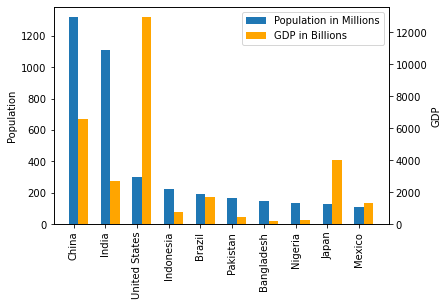

In [4]:
import numpy as np # We're going to import np for np.arange().
# np.arange(10) is similar to range(10), and it allows us to shift
# each value in it by the bar width as you can see below.
x = np.arange(10)

# We need to create subplots in order to overlay two bar plots
# with proper axes on the left hand side and the right hand side.
fig, ax1 = plt.subplots()

width = 0.3 # This is the width of each bar in the bar plot.
plt.xticks(x, top10.country, rotation='vertical')
population = ax1.bar(x, top10.population / 10**6, width)
plt.ylabel('Population')

# ax1.twinx() gives us the same x-axis with the y-axis on the right.
ax2 = ax1.twinx()
gdp = ax2.bar(x + width, top10.gdpPerCapita * top10.population / 10**9,
              width, color='orange')
plt.ylabel('GDP')
plt.legend([population, gdp],
           ['Population in Millions', 'GDP in Billions'])
figure = plt.gcf() # get current figure
plt.show()